#### March 25, 2021
#### Lori Segovia


![Image of Zillow Logo](https://theme.zdassets.com/theme_assets/512712/5675f10a90572d0f4140b0b39e72e4905bce34ee.jpg)

# <span style="color:black;"> Estimating Home Value </span>


## <span style="color:royalblue;"> Goals </span>
* Predict values of single unit properties that the tax distict assess using the property data from those whose last transaction was during May 2017 - August 2017
* Obtain States and Counties of properties
* Obtain tax rates for each country
* Provide distribution of tax rates for each county

## <span style="color:royalblue;"> Executive Summary </span>

## <span style="color:royalblue;"> Hypotheses </span>
**1.  There is not a linear correlation between square footage of home and tax value.**
**2.  There**

## <span style="color:royalblue;"> Acquire </span>

- Zillow data was queried from Codeup mysql database

#### Imports

In [1]:
## python files that contain the functions to aquire and prep the data
import wrangle
import pandas as pd
import numpy as np

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# scikit learn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-talk') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

#warnings
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = wrangle.clean_zillow(wrangle.acquire_zillow())

In [33]:
df.head()

,parcelid,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
0,14297519,4,3.5,1998,1286,96978,6059,33634931,-117869207,3100.0,11013.72,1023282.0,23,0.010763
1,17052889,2,1.0,1967,2061,97099,6111,34449266,-119281531,1465.0,5672.48,464000.0,54,0.012225
2,14186244,3,2.0,1962,1286,97078,6059,33886168,-117823170,1243.0,6488.30,564778.0,59,0.011488
3,12177905,4,3.0,1970,3101,96330,6037,34245180,-118240722,2376.0,1777.51,145143.0,51,0.012247
4,10887214,3,3.0,1964,3101,96451,6037,34185120,-118414640,1312.0,1533.89,119407.0,57,0.012846


In [34]:
df.describe()

,parcelid,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
count,7.725300e+04,77253.00000,77253.000000,77253.000000,77253.000000,77253.000000,77253.000000,7.725300e+04,7.725300e+04,77253.000000,77253.000000,7.725300e+04,77253.000000,77253.000000
mean,1.295362e+07,3.06115,2.304254,1968.598799,2535.858905,96586.484033,6048.770261,3.400856e+07,-1.182035e+08,1784.127568,5977.930106,4.886524e+05,52.401201,0.013167
std,2.149332e+06,1.12984,0.990168,23.786244,801.100915,3800.227667,20.707202,2.652595e+05,3.588717e+05,953.267975,7576.150343,6.499134e+05,23.786244,0.005758
min,1.071186e+07,0.00000,0.000000,1824.000000,1286.000000,95982.000000,6037.000000,3.333953e+07,-1.194753e+08,128.000000,19.920000,1.000000e+03,5.000000,0.000094
25%,1.153582e+07,2.00000,2.000000,1953.000000,1286.000000,96193.000000,6037.000000,3.381480e+07,-1.184150e+08,1182.000000,2714.890000,2.070000e+05,34.000000,0.011662
50%,1.252847e+07,3.00000,2.000000,1970.000000,3101.000000,96389.000000,6037.000000,3.402210e+07,-1.181809e+08,1541.000000,4447.620000,3.587690e+05,51.000000,0.012286
75%,1.420782e+07,4.00000,3.000000,1987.000000,3101.000000,96987.000000,6059.000000,3.417436e+07,-1.179290e+08,2110.000000,6920.740000,5.685390e+05,68.000000,0.013455
max,1.629608e+08,16.00000,18.000000,2016.000000,3101.000000,399675.000000,6111.000000,3.481877e+07,-1.175546e+08,35640.000000,586639.300000,4.906124e+07,197.000000,0.816490


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77253 entries, 0 to 77613
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   parcelid      77253 non-null  int64  
 1   bedrooms      77253 non-null  int64  
 2   bathrooms     77253 non-null  float64
 3   yearbuilt     77253 non-null  int64  
 4   county        77253 non-null  int64  
 5   zip_code      77253 non-null  int64  
 6   fips          77253 non-null  int64  
 7   latitude      77253 non-null  int64  
 8   longitude     77253 non-null  int64  
 9   square_feet   77253 non-null  float64
 10  taxamount     77253 non-null  float64
 11  tax_value     77253 non-null  float64
 12  property_age  77253 non-null  int64  
 13  tax_rate      77253 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 8.8 MB


In [36]:
df.shape

(77253, 14)

## <span style="color:royalblue;"> Additional Info (outside of the model) </span>

- states and counties the properties are located in
- distribution of tax rates for each county 
- distribution of tax rates for each county so that we can see how much they vary within the properties in the county and the rates the bulk of the properties sit around

### States and Counties of Properties

#### The Federal Information Processing Standard Publication 6-4 (FIPS 6-4) was a five-digit Federal Information Processing Standards code which uniquely identified counties and county equivalents in the United States, certain U.S. possessions, and certain freely associated states.  These are the location of the following States and Counties obtained from looking up FIPS code:
* Los Angeles County, California (6037)
* Orange County, California (6059)
* Ventura County, California (6111)

In [37]:
df.fips.value_counts()

6037    50555
6059    20507
6111     6191
Name: fips, dtype: int64

In [38]:
df.fips.value_counts(normalize=True)

6037    0.654408
6059    0.265452
6111    0.080139
Name: fips, dtype: float64

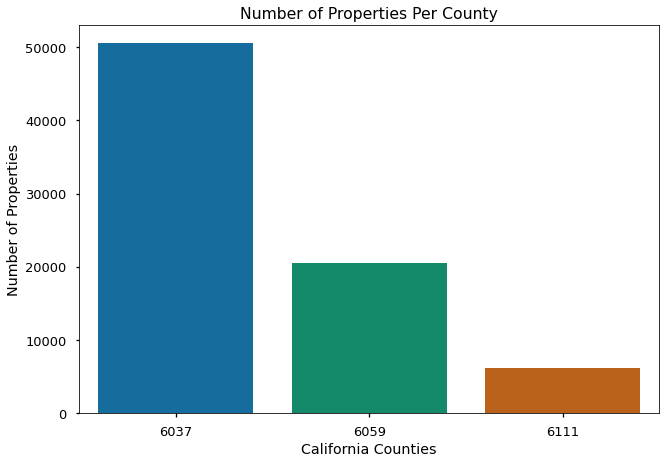

In [39]:
plt.title('Number of Properties Per County')
sns.countplot(df.fips)
plt.xlabel('California Counties')
plt.ylabel('Number of Properties')
plt.show()

In [40]:
#Change fips to county names now that we know where they come from
df.rename(columns={"fips": "ca_county"}, inplace=True)


In [41]:
df['ca_county'] = df['ca_county'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})


In [42]:
df.head()

,parcelid,bedrooms,bathrooms,yearbuilt,county,zip_code,ca_county,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
0,14297519,4,3.5,1998,1286,96978,Orange,33634931,-117869207,3100.0,11013.72,1023282.0,23,0.010763
1,17052889,2,1.0,1967,2061,97099,Ventura,34449266,-119281531,1465.0,5672.48,464000.0,54,0.012225
2,14186244,3,2.0,1962,1286,97078,Orange,33886168,-117823170,1243.0,6488.30,564778.0,59,0.011488
3,12177905,4,3.0,1970,3101,96330,Los Angeles,34245180,-118240722,2376.0,1777.51,145143.0,51,0.012247
4,10887214,3,3.0,1964,3101,96451,Los Angeles,34185120,-118414640,1312.0,1533.89,119407.0,57,0.012846


In [43]:
df.ca_county.value_counts()

Los Angeles    50555
Orange         20507
Ventura         6191
Name: ca_county, dtype: int64

### Distribution of Tax Rate 

In [47]:
tax_rates = df.groupby("ca_county").tax_rate.mean()
tax_rates

ca_county
Los Angeles    0.013768
Orange         0.012064
Ventura        0.011912
Name: tax_rate, dtype: float64

### Distribution of Tax Rate Variance

## <span style="color:royalblue;"> Prepare </span>

## <span style="color:royalblue;"> Explore </span>

## <span style="color:royalblue;"> Model </span>

### <span style="color:dodgerblue;"> Evaluate </span>

#### <span style="color:deepskyblue;"> SSE, RMSE, MSE </span>